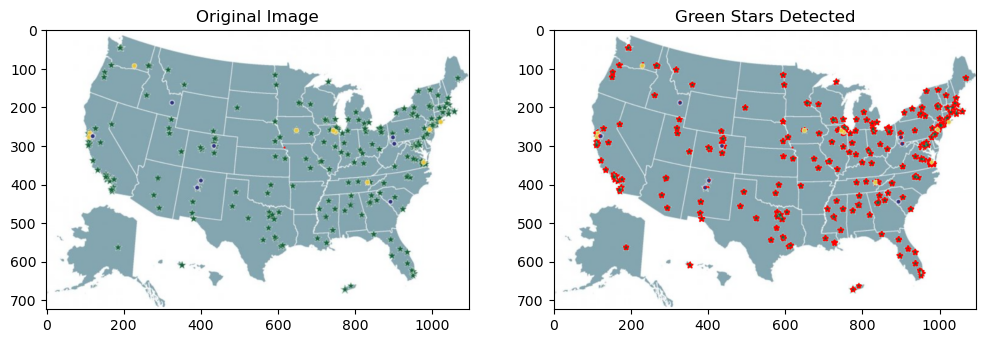

In [4]:
# Let's analyze the provided map image to detect the green five-point stars
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'fig/image.png'
image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the color range for green in RGB
lower_green = np.array([0, 100, 0])
upper_green = np.array([150, 255, 150])

# Create a mask for green areas
mask = cv2.inRange(image_rgb, lower_green, upper_green)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Prepare to display the contours
image_contours = image_rgb.copy()

# Draw contours
cv2.drawContours(image_contours, contours, -1, (255, 0, 0), 2)

# Display the original and processed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(image_contours)
ax[1].set_title('Green Stars Detected')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


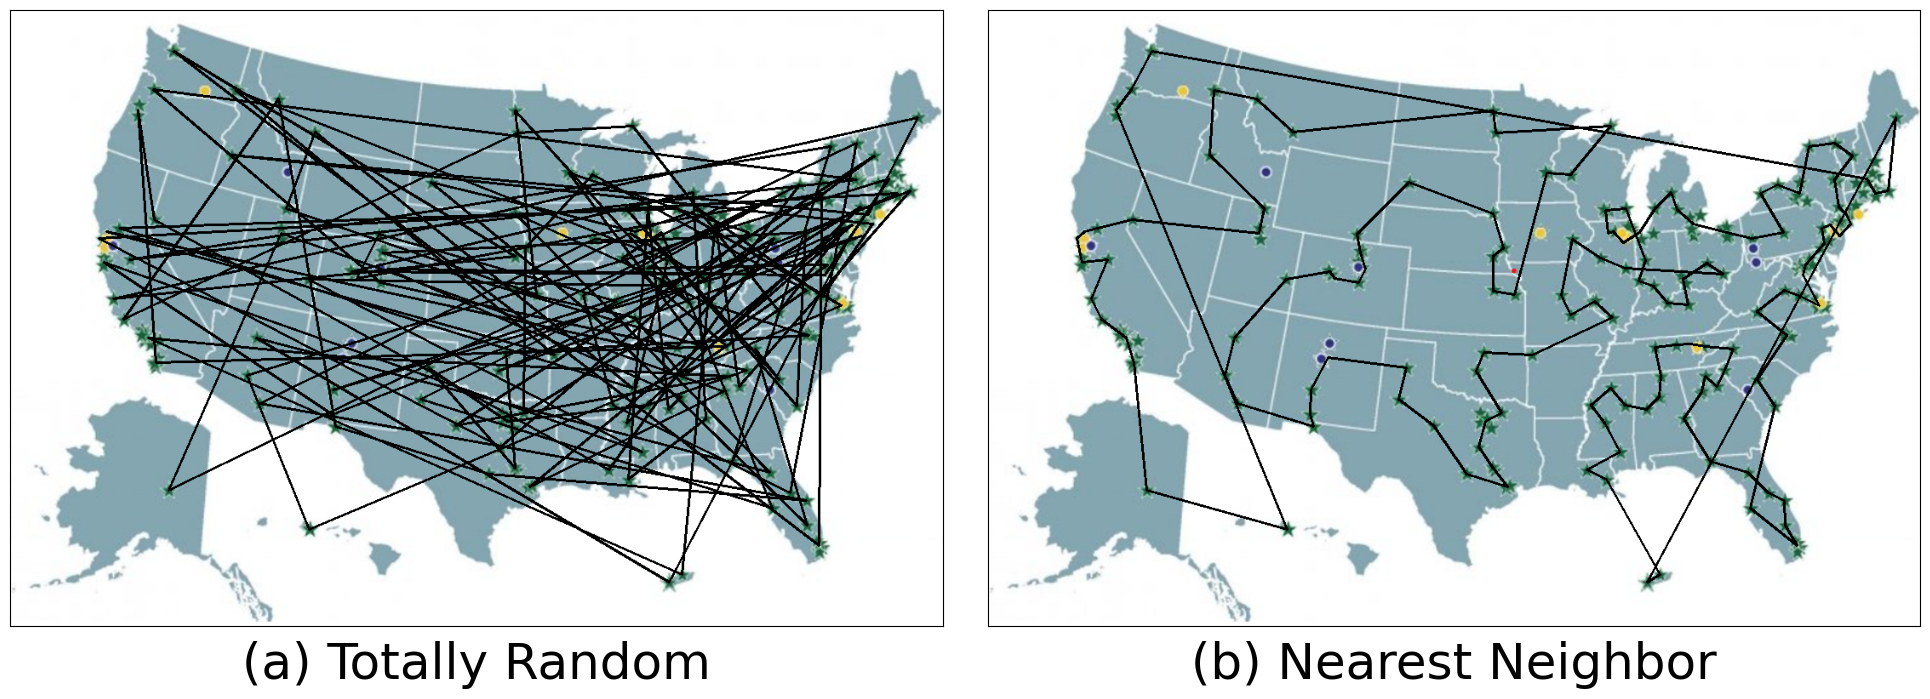

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


In [41]:
# To create a Hamiltonian cycle among the detected points, we first need to calculate the centroids of all valid contours.
# Then, we will compute a Hamiltonian cycle using a simple nearest neighbor heuristic to visit all points exactly once before returning to the start.

import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 30,
    'font.family': 'Times New Roman',
})
# Compute centroids of all valid contours and store them
centroids = []
for cnt in contours:
    if cv2.contourArea(cnt) > 0:
        M = cv2.moments(cnt)
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
        centroids.append((x, y))

# Nearest Neighbor Heuristic to create a Hamiltonian cycle
def nearest_neighbor(points):
    start = points[0]
    path = [start]
    points = set(points)
    points.remove(start)
    
    current = start
    while points:
        next_point = min(points, key=lambda point: np.hypot(point[0]-current[0], point[1]-current[1]))
        path.append(next_point)
        points.remove(next_point)
        current = next_point
    path.append(start)  # return to start to complete the cycle
    return path

# Function to generate a random Hamiltonian cycle
def random_hamiltonian_cycle(points):
    random_points = points.copy()
    np.random.shuffle(random_points)
    return random_points + [random_points[0]]  # return to start

# Use the nearest neighbor heuristic to find an approximate shortest Hamiltonian cycle
nearest_neighbor_path = nearest_neighbor(centroids)

# Generate a totally random Hamiltonian cycle
random_cycle = random_hamiltonian_cycle(centroids)

# Function to plot a Hamiltonian cycle
def plot_hamilton_cycle(image, path, title, subplot):
    img_copy = image.copy()
    for i in range(len(path) - 1):
        cv2.line(img_copy, path[i], path[i+1], (0, 0, 0), 2)  # Using green lines for visibility
    plt.subplot(1, 2, subplot)
    plt.imshow(img_copy)
    plt.title(title, y=-0.1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("")

# Plot both cycles
fig = plt.figure(figsize=(20, 10))
plot_hamilton_cycle(image_rgb, random_cycle, '(a) Totally Random', 1)
plot_hamilton_cycle(image_rgb, nearest_neighbor_path, '(b) Nearest Neighbor', 2)
plt.subplots_adjust(wspace=0)
plt.tight_layout()
plt.show()
fig.savefig('fig/random_vs_nn.pdf', bbox_inches='tight')


In [28]:
print(nearest_neighbor_path)

[(774, 672), (789, 663), (726, 551), (703, 540), (742, 519), (724, 485), (708, 464), (731, 444), (748, 464), (773, 469), (788, 454), (790, 430), (783, 396), (808, 393), (825, 392), (842, 395), (875, 398), (865, 423), (856, 442), (842, 430), (838, 448), (817, 480), (848, 530), (892, 543), (916, 567), (935, 576), (936, 605), (950, 629), (895, 585), (924, 465), (903, 434), (938, 382), (903, 354), (935, 329), (954, 336), (976, 347), (957, 311), (960, 299), (982, 274), (979, 256), (989, 252), (1000, 265), (1013, 251), (1008, 240), (999, 231), (994, 199), (1015, 171), (994, 156), (964, 160), (953, 215), (927, 205), (907, 215), (934, 261), (897, 268), (867, 261), (828, 251), (809, 234), (802, 214), (783, 233), (765, 261), (746, 273), (734, 260), (728, 262), (725, 235), (749, 233), (772, 294), (764, 318), (781, 324), (798, 344), (822, 346), (816, 316), (844, 297), (863, 310), (748, 303), (719, 291), (686, 269), (673, 335), (684, 358), (712, 342), (733, 361), (639, 405), (582, 402), (573, 424),